# Analyzing Public Reaction to events via Google Searches

Current events like the Covid-19 have shown us that the public of some countries is a lot more reactive to events than others. Our project aims to analyze the time to react for different 

In [ ]:
# All of the imports
import pandas as pd
import numpy as np
import os
import urllib.request
from matplotlib import pyplot
import matplotlib.dates as mdate
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import plotly.express as px


# Importing Data from Github Repos

In [ ]:
!git clone https://github.com/sigadavid96/TimeToReact_Forecasting

fatal: destination path 'TimeToReact_Forecasting' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Getting the worldwide covid data
link="https://covid.ourworldindata.org/data/owid-covid-data.csv"
urllib.request.urlretrieve(link, 'owid-covid-data.csv')

('owid-covid-data.csv', <http.client.HTTPMessage at 0x7fa68e4b3d10>)

# Visualizing the Raw data

Looking at the google trends data for a country

In [ ]:
%ls drive/MyDrive/15688\ Final\ Project
google_us_trends=pd.read_csv("drive/MyDrive/15688 Final Project/us_data.csv")
google_gb_trends = pd.read_csv("drive/MyDrive/15688 Final Project/gb_data.csv")
google_in_trends = pd.read_csv("drive/MyDrive/15688 Final Project/in_data.csv")

 FinalProject15688.ipynb
'Final Project Ideas and Data Links.gdoc'
'Final Project Implementation Plan.gdoc'
 gb_data.csv
 in_data.csv
'Stuti_pytrends Python Visualization.ipynb'
 us_data.csv


In [ ]:
# Fundamentally, the data comes in hour level. we need to bring it to day level
google_us_trends = google_us_trends.drop(columns = 'isPartial')
google_us_trends.tail()
google_gb_trends = google_gb_trends.drop(columns = 'isPartial')
google_in_trends = google_in_trends.drop(columns = 'isPartial')


In [ ]:
google_us_trends.tail()

,date,Covid,Coronavirus,Region
22762,2022-04-30 20:00:00,53,2,US
22763,2022-04-30 21:00:00,51,3,US
22764,2022-04-30 22:00:00,52,3,US
22765,2022-04-30 23:00:00,50,3,US
22766,2022-05-01 00:00:00,52,3,US


In [ ]:
def group_by_date(google_trends):
  times = pd.to_datetime(google_trends.date)
  tempDf=pd.DataFrame(google_trends.groupby([times.dt.date]).Covid.mean())
  corona=google_trends.groupby([times.dt.date]).Coronavirus.mean()
  google_trends=tempDf
  google_trends['Coronavirus']=corona
  google_trends.index=pd.to_datetime(google_trends.index)
  return google_trends


In [ ]:
# Resetting the index to date , it helps with plotting
google_us_trends = group_by_date(google_us_trends)
google_gb_trends = group_by_date(google_gb_trends)
google_in_trends = group_by_date(google_in_trends)


In [ ]:
def combine_query_terms(google_trends):
  google_trends['covid_trend'] = google_trends['Covid'] + google_trends['Coronavirus']
  return google_trends


In [ ]:
# We have about 2.5 years of google trends interest data for USA
google_us_trends.index.min(),google_us_trends.index.max()

(Timestamp('2019-10-01 00:00:00'), Timestamp('2022-05-01 00:00:00'))

In [ ]:
google_us_trends.describe()
google_us_trends = combine_query_terms(google_us_trends)

google_gb_trends['covid_trend'] = google_gb_trends['Covid'] + google_gb_trends['Coronavirus']
google_gb_trends.tail()

google_in_trends['covid_trend'] = google_in_trends['Covid'] + google_in_trends['Coronavirus']
google_in_trends.tail()
google_us_trends.tail()

,Covid,Coronavirus,covid_trend
date,,,
2022-04-27,72.541667,4.791667,77.333333
2022-04-28,71.458333,4.208333,75.666667
2022-04-29,63.125000,3.833333,66.958333
2022-04-30,58.041667,3.583333,61.625000
2022-05-01,52.000000,3.000000,55.000000


# Comparing Trends in Usage of the word 'Covid' vs 'Coronavirus'


Option 1




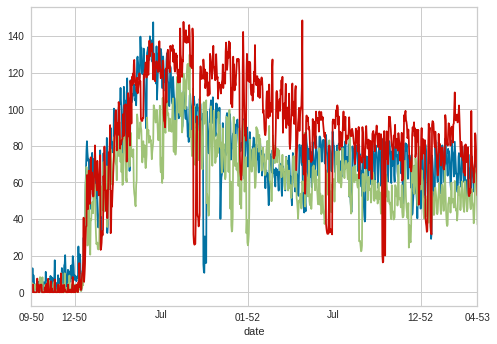

In [ ]:
google_us_trends.index=pd.to_datetime(google_us_trends.index)
google_us_trends['covid_trend'].plot()
google_gb_trends['covid_trend'].plot()
google_in_trends['covid_trend'].plot()
#pyplot.tight_layout()
myFmt = mdate.DateFormatter('%m-%Y')
pyplot.gca().xaxis.set_major_formatter(myFmt)

# people start replacing coronavirus with the word : covid

## Comparing Google Search Trends For US, GB, and IN 

From the below, we can see that the search trends for US, GB, and IN remain about the same 

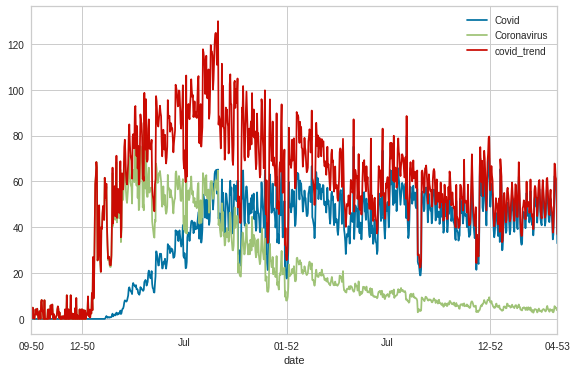

In [ ]:
google_gb_trends.index=pd.to_datetime(google_gb_trends.index)
google_gb_trends.plot()
pyplot.tight_layout()
myFmt = mdate.DateFormatter('%m-%Y')
pyplot.gca().xaxis.set_major_formatter(myFmt)

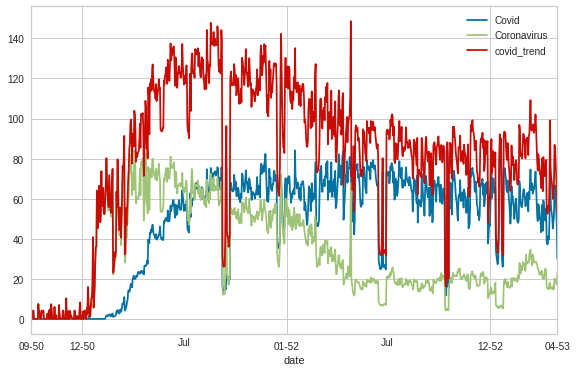

In [ ]:
google_in_trends.index=pd.to_datetime(google_in_trends.index)
google_in_trends.plot()
pyplot.tight_layout()
myFmt = mdate.DateFormatter('%m-%Y')
pyplot.gca().xaxis.set_major_formatter(myFmt)

Looking at the above graph with rolling mean window of 7 days to smoothen

In [ ]:
def get_rolling_mean_trends(google_trends):
  # Rolling mean data
  rolling_google_trends=pd.DataFrame(google_trends.covid_trend.rolling(7, min_periods=1).mean())
  rolling_google_trends.index=pd.to_datetime(rolling_google_trends.index)
  return rolling_google_trends

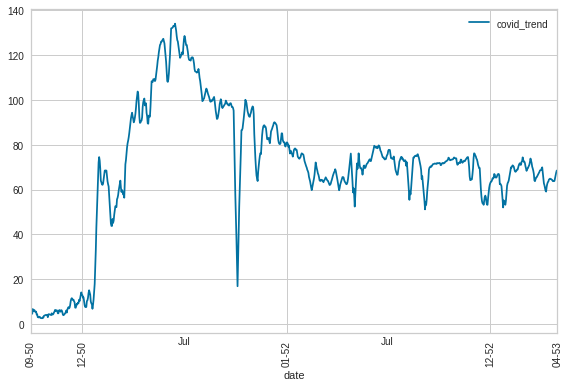

In [ ]:
rolling_google_us_trends = get_rolling_mean_trends(google_us_trends)
rolling_google_us_trends.plot()
pyplot.xticks(rotation = 90)
pyplot.tight_layout()
myFmt = mdate.DateFormatter('%m-%Y')
pyplot.gca().xaxis.set_major_formatter(myFmt)



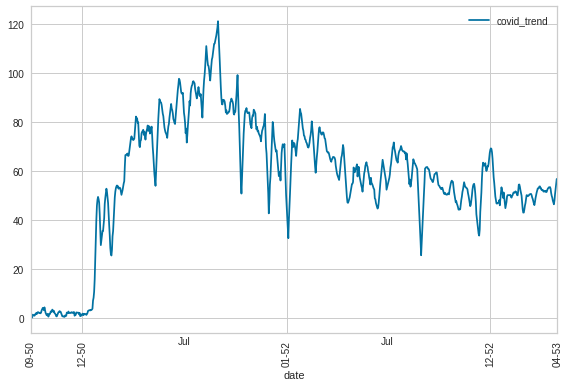

In [ ]:
rolling_google_gb_trends = get_rolling_mean_trends(google_gb_trends)
rolling_google_gb_trends.plot()
pyplot.xticks(rotation = 90)
pyplot.tight_layout()
myFmt = mdate.DateFormatter('%m-%Y')
pyplot.gca().xaxis.set_major_formatter(myFmt)


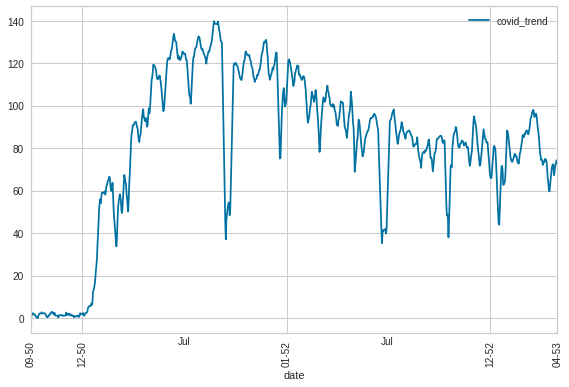

In [ ]:
rolling_google_in_trends = get_rolling_mean_trends(google_in_trends)
rolling_google_in_trends.plot()
pyplot.xticks(rotation = 90)
pyplot.tight_layout()
myFmt = mdate.DateFormatter('%m-%Y')
pyplot.gca().xaxis.set_major_formatter(myFmt)

Looking at the covid19 opensourced data

In [ ]:
# Store the data
owid_df=pd.read_csv("/content/owid-covid-data.csv")

In [ ]:
# Looking at the breadth of info we have
usa_df_pos_rate_full=owid_df.loc[owid_df.iso_code=='USA']

usa_df_pos_rate=owid_df.loc[owid_df.iso_code=='USA'][['new_tests_smoothed_per_thousand','date']]

usa_df_pos_rate_full_nonzero=usa_df_pos_rate_full[usa_df_pos_rate['new_tests_smoothed_per_thousand'].notnull()]

usa_df_pos_rate_nonzero=usa_df_pos_rate[usa_df_pos_rate['new_tests_smoothed_per_thousand'].notnull()]

usa_df_pos_rate_nonzero

,new_tests_smoothed_per_thousand,date
172992,0.004,2020-03-08
172993,0.004,2020-03-09
172994,0.006,2020-03-10
172995,0.007,2020-03-11
172996,0.011,2020-03-12
...,...,...
173767,1.726,2022-04-22
173768,1.696,2022-04-23
173769,1.688,2022-04-24
173770,1.684,2022-04-25


In [ ]:
# Subsetting for USA and non zero positive rates
def get_subset_owid_data(country, metric):
  usa_df_pos_rate_full=owid_df.loc[owid_df.iso_code==country]
  
  usa_df_pos_rate=owid_df.loc[owid_df.iso_code==country][[metric,'date']]

  usa_df_pos_rate_full_nonzero=usa_df_pos_rate_full[usa_df_pos_rate[metric].notnull()]

  usa_df_pos_rate_nonzero=usa_df_pos_rate[usa_df_pos_rate[metric].notnull()]

  # reset index for good plottings
  usa_df_pos_rate_nonzero.index=pd.to_datetime(usa_df_pos_rate_nonzero.date)
  usa_df_pos_rate_full_nonzero.index=pd.to_datetime(usa_df_pos_rate_full_nonzero.date)
  return usa_df_pos_rate_nonzero, usa_df_pos_rate_full_nonzero

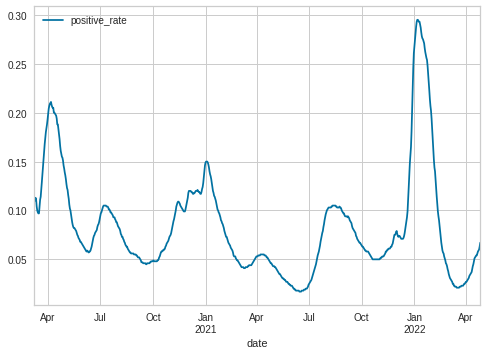

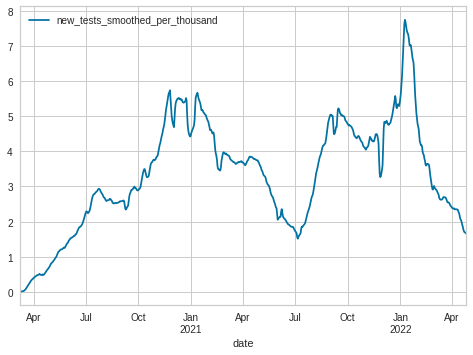

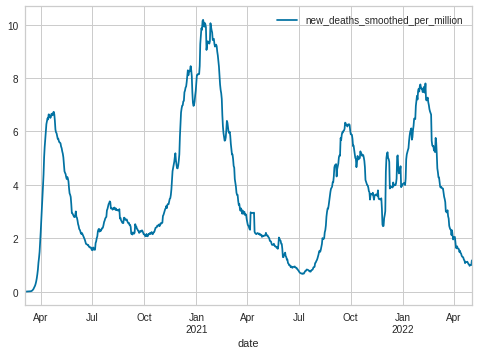

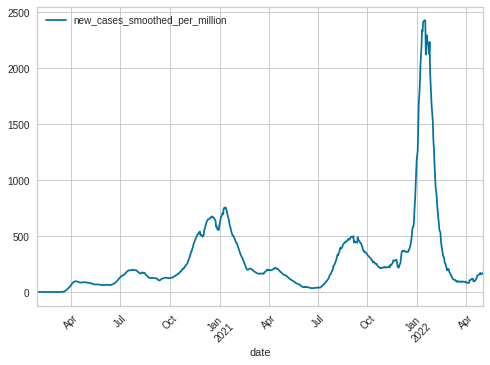

In [ ]:
# Plotting the postivity rates
usa_df_pos_rate_nonzero, usa_df_pos_rate_full_nonzero = get_subset_owid_data('USA', 'positive_rate')
usa_df_new_test_nonzero, usa_df_new_tests_full_nonzero = get_subset_owid_data('USA', 'new_tests_smoothed_per_thousand')
usa_df_death_rate_nonzero, usa_df_death_rate_full_nonzero = get_subset_owid_data('USA', 'new_deaths_smoothed_per_million')
usa_df_new_cases_nonzero, usa_df_new_cases_full_nonzero = get_subset_owid_data('USA', 'new_cases_smoothed_per_million')
usa_df_pos_rate_nonzero.plot()
usa_df_new_test_nonzero.plot()
usa_df_death_rate_nonzero.plot()
usa_df_new_cases_nonzero.plot()
pyplot.xticks(rotation = 45)
pyplot.show()
# We notice a cyclic trend in covid positivity trend

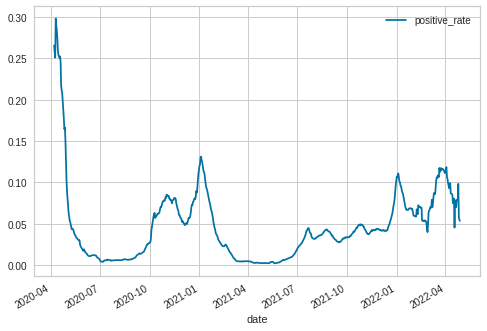

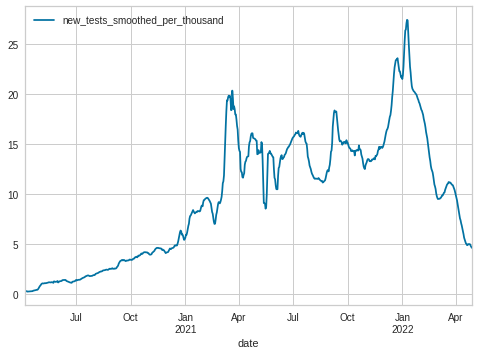

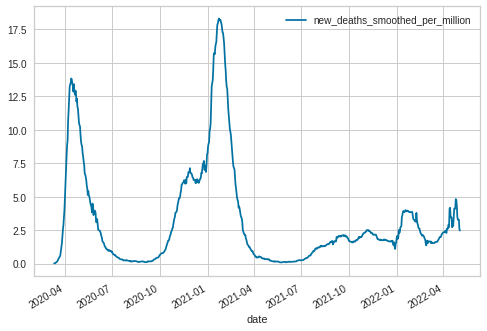

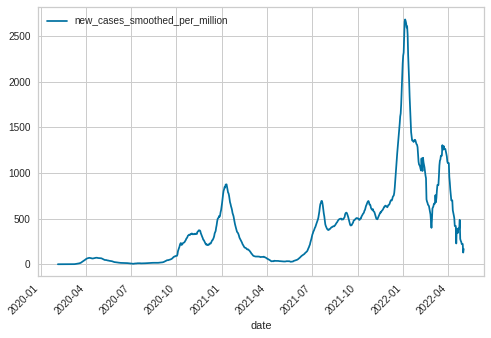

In [ ]:
# Plotting the postivity rates

gb_df_pos_rate_nonzero, gb_df_pos_rate_full_nonzero = get_subset_owid_data('GBR', 'positive_rate')
gb_df_new_test_nonzero, gb_df_new_tests_full_nonzero = get_subset_owid_data('GBR', 'new_tests_smoothed_per_thousand')
gb_df_death_rate_nonzero, gb_df_death_rate_full_nonzero = get_subset_owid_data('GBR', 'new_deaths_smoothed_per_million')
gb_df_new_cases_nonzero, gb_df_new_cases_full_nonzero = get_subset_owid_data('GBR', 'new_cases_smoothed_per_million')
gb_df_pos_rate_nonzero.plot()
gb_df_new_test_nonzero.plot()
gb_df_death_rate_nonzero.plot()
gb_df_new_cases_nonzero.plot()
pyplot.xticks(rotation = 45)
pyplot.show()


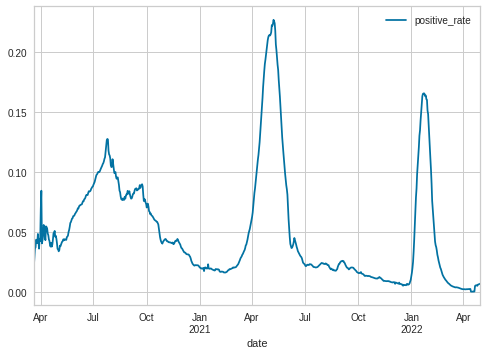

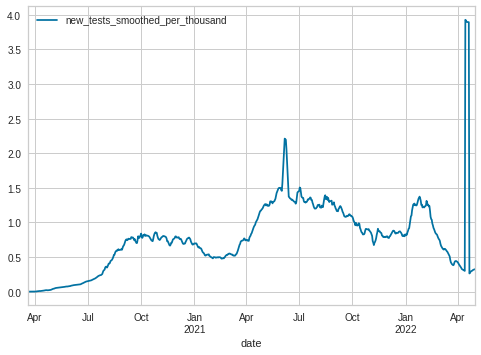

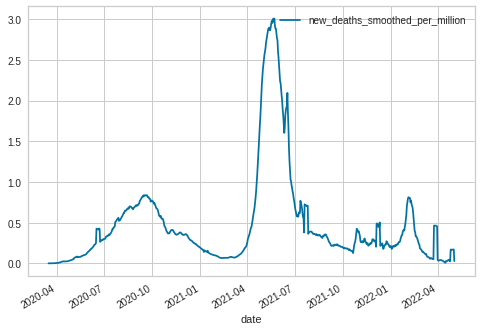

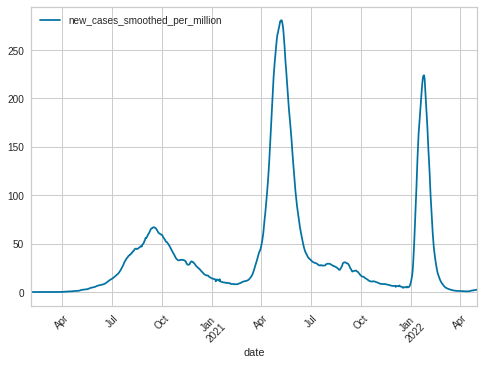

In [ ]:
in_df_pos_rate_nonzero, in_df_pos_rate_full_nonzero = get_subset_owid_data('IND', 'positive_rate')
in_df_new_test_nonzero, in_df_new_tests_full_nonzero = get_subset_owid_data('IND', 'new_tests_smoothed_per_thousand')
in_df_death_rate_nonzero, in_df_death_rate_full_nonzero = get_subset_owid_data('IND', 'new_deaths_smoothed_per_million')
in_df_new_cases_nonzero, in_df_new_cases_full_nonzero = get_subset_owid_data('IND', 'new_cases_smoothed_per_million')
in_df_pos_rate_nonzero.plot()
in_df_new_test_nonzero.plot()
in_df_death_rate_nonzero.plot()
in_df_new_cases_nonzero.plot()
pyplot.xticks(rotation = 45)
pyplot.show()


In [ ]:
google_trends = google_us_trends
google_trends['us_trend'] = google_us_trends['covid_trend']
google_trends['gb_trend'] = google_gb_trends['covid_trend']
google_trends['in_trend'] = google_in_trends['covid_trend']

fig = px.line(google_trends, y=['us_trend', 'gb_trend', 'in_trend'], title='Time Series with Range Slider and Selectors')
#fig.add_scatter(x=google_gb_trends.index, y=google_gb_trends['covid_trend'], mode='lines', label="GB")
#fig.add_scatter(x=google_in_trends.index, y=google_in_trends['covid_trend'], mode='lines')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(showlegend=True)

fig.show()


In [ ]:
death_rate = usa_df_death_rate_nonzero
death_rate['us_trend'] = usa_df_death_rate_nonzero['new_deaths_smoothed_per_million']
death_rate['gb_trend'] = gb_df_death_rate_nonzero['new_deaths_smoothed_per_million']
death_rate['in_trend'] = in_df_death_rate_nonzero['new_deaths_smoothed_per_million']

fig = px.line(google_trends, y=['us_trend', 'gb_trend', 'in_trend'], title='New Deaths Smoothed Per Million For US, UK, and India')
#fig.add_scatter(x=google_gb_trends.index, y=google_gb_trends['covid_trend'], mode='lines', label="GB")
#fig.add_scatter(x=google_in_trends.index, y=google_in_trends['covid_trend'], mode='lines')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(showlegend=True)

fig.show()

# Visualizing Covid Positivity Rate + Google Trends togehter

In [ ]:
rolling_google_us_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 944 entries, 2019-10-01 to 2022-05-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   covid_trend  944 non-null    float64
dtypes: float64(1)
memory usage: 14.8 KB


In [ ]:
usa_df_pos_rate_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 781 entries, 2020-03-07 to 2022-04-26
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   positive_rate  781 non-null    float64
 1   date           781 non-null    object 
dtypes: float64(1), object(1)
memory usage: 18.3+ KB


In [ ]:
def covid_metric_and_google(df_pos_rate_nonzero, rolling_google_trends, metric):
  Covid_Positive_And_Google=pd.merge(df_pos_rate_nonzero, rolling_google_trends, left_index=True, right_index=True)
  # Covid_Positive_And_Google.describe()
  scaler = MinMaxScaler(feature_range=(0, 100))
  Covid_Positive_And_Google[[metric,'covid_trend']] = scaler.fit_transform(Covid_Positive_And_Google[[metric,'covid_trend']])
  return Covid_Positive_And_Google
# Scaling by 100

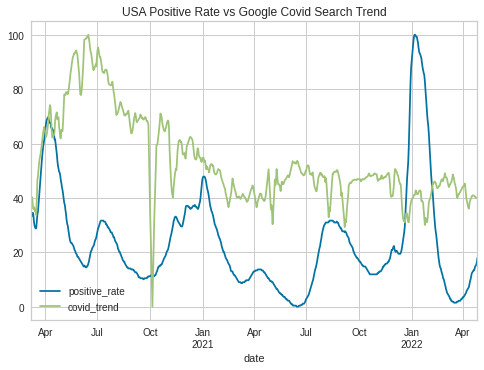

In [ ]:
Covid_Positive_USA_And_Google = covid_metric_and_google(usa_df_new_test_nonzero, rolling_google_us_trends, 'positive_rate')
Covid_Positive_USA_And_Google.index = pd.to_datetime(Covid_Positive_USA_And_Google.date)
Covid_Positive_USA_And_Google.plot(title="USA Positive Rate vs Google Covid Search Trend")

,new_deaths_smoothed_per_million,date,covid_trend
date,,,
2020-03-16,0.000000,2020-03-16,30.737786
2020-03-17,0.000000,2020-03-17,29.605780
2020-03-18,0.000000,2020-03-18,27.452508
2020-03-19,0.000000,2020-03-19,26.820198
2020-03-20,0.000000,2020-03-20,22.769996
...,...,...,...
2022-04-27,5.553708,2022-04-27,34.255936
2022-04-28,5.586964,2022-04-28,35.657272
2022-04-29,5.653475,2022-04-29,36.688336


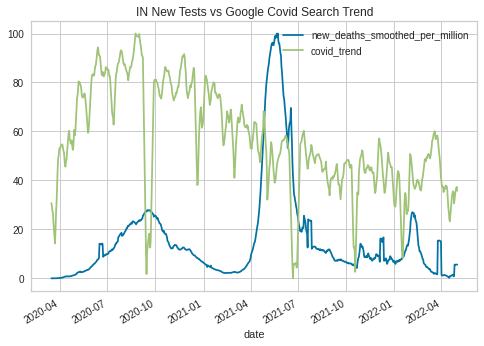

In [ ]:
Covid_Death_USA_And_Google = covid_metric_and_google(in_df_death_rate_nonzero, rolling_google_in_trends, 'new_tests_smoothed_per_million')
Covid_Death_USA_And_Google.index = pd.to_datetime(Covid_Death_USA_And_Google.date)
Covid_Death_USA_And_Google.plot(title="IN New Tests vs Google Covid Search Trend")
Covid_Death_USA_And_Google

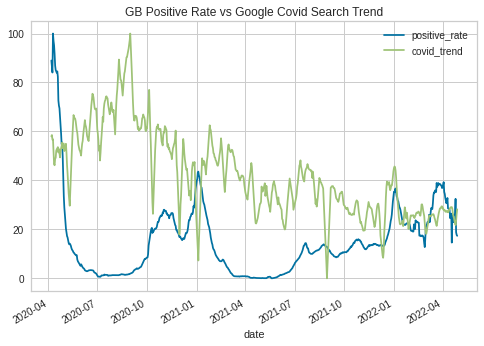

In [ ]:
Covid_Positive_GB_And_Google = covid_metric_and_google(gb_df_pos_rate_nonzero, rolling_google_gb_trends, 'positive_rate')
Covid_Positive_GB_And_Google.index = pd.to_datetime(Covid_Positive_GB_And_Google.date)
Covid_Positive_GB_And_Google.plot(title="GB Positive Rate vs Google Covid Search Trend")

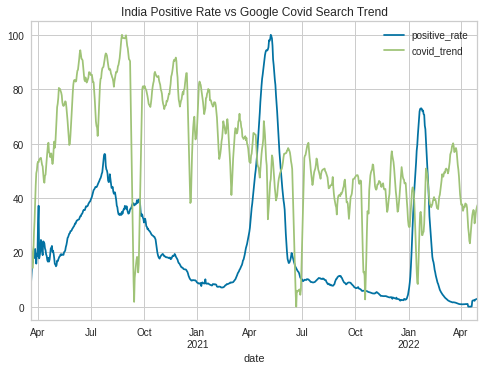

In [ ]:
Covid_Positive_IN_And_Google = covid_metric_and_google(in_df_pos_rate_nonzero, rolling_google_in_trends, 'positive_rate')
Covid_Positive_IN_And_Google.index = pd.to_datetime(Covid_Positive_IN_And_Google.date)
Covid_Positive_IN_And_Google.plot(title="India Positive Rate vs Google Covid Search Trend")

In [ ]:
Covid_Positive_And_Google.corr()
# Clearly coronavirus keyword is misinforming us

,positive_rate,covid_trend
positive_rate,1.000000,0.021283
covid_trend,0.021283,1.000000


Linear Model to check variable importance


In [ ]:
usa_df_pos_rate_nonzero.describe()

,positive_rate
count,781.000000
mean,0.084120
std,0.055246
min,0.017000
25%,0.049000
50%,0.069000
75%,0.103000
max,0.295000


In [ ]:
usa_df_pos_rate_nonzero.shape,rolling_google_us_trends.shape

((781, 2), (944, 1))

In [ ]:
full_Covid_Positive_And_Google=pd.merge(usa_df_pos_rate_full_nonzero,rolling_google_us_trends, left_index=True, right_index=True)
# Around 450+ datapoints are overlapping

In [ ]:
def drop_cols_threshold(df,per=75,drop_object=True):
  # ref : https://stackoverflow.com/questions/47414848/pandas-select-all-columns-without-nan
  cols_to_delete = df.columns[df.isnull().sum()/len(df) > (per/100)]
  df.drop(cols_to_delete, axis = 1, inplace = True)
  if drop_object==True:
     df=df.select_dtypes(exclude=['object'])
  return df

In [ ]:
full_Covid_Positive_And_Google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 781 entries, 2020-03-07 to 2022-04-26
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    781 non-null    object 
 1   continent                                   781 non-null    object 
 2   location                                    781 non-null    object 
 3   date                                        781 non-null    object 
 4   total_cases                                 781 non-null    float64
 5   new_cases                                   781 non-null    float64
 6   new_cases_smoothed                          781 non-null    float64
 7   total_deaths                                781 non-null    float64
 8   new_deaths                                  781 non-null    float64
 9   new_deaths_smoothed                         781 non-null    float64


In [ ]:
# Allowing for only 5% missingness in data, and dropping object columns
full_Covid_Positive_And_Google=drop_cols_threshold(full_Covid_Positive_And_Google,5)
full_Covid_Positive_And_Google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 781 entries, 2020-03-07 to 2022-04-26
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_cases                      781 non-null    float64
 1   new_cases                        781 non-null    float64
 2   new_cases_smoothed               781 non-null    float64
 3   total_deaths                     781 non-null    float64
 4   new_deaths                       781 non-null    float64
 5   new_deaths_smoothed              781 non-null    float64
 6   total_cases_per_million          781 non-null    float64
 7   new_cases_per_million            781 non-null    float64
 8   new_cases_smoothed_per_million   781 non-null    float64
 9   total_deaths_per_million         781 non-null    float64
 10  new_deaths_per_million           781 non-null    float64
 11  new_deaths_smoothed_per_million  781 non-null    float64
 12  rep

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(full_Covid_Positive_And_Google)

MinMaxScaler(feature_range=(0, 100))

In [ ]:
full_Covid_Positive_And_Google

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,covid_trend
date,,,,,,,,,,,,,,,,,,,,,
2020-03-07,403.0,166.0,54.000,17.0,3.0,2.286,1.211,0.499,0.162,0.051,...,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926,61.042619
2020-03-08,519.0,116.0,69.571,21.0,4.0,2.857,1.559,0.348,0.209,0.063,...,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926,62.822381
2020-03-09,594.0,75.0,77.000,22.0,1.0,2.286,1.784,0.225,0.231,0.066,...,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926,64.012857
2020-03-10,782.0,188.0,101.143,28.0,6.0,3.000,2.349,0.565,0.304,0.084,...,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926,60.801429
2020-03-11,1147.0,365.0,148.571,33.0,5.0,3.143,3.445,1.096,0.446,0.099,...,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926,58.938333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,80954558.0,90019.0,48414.000,991327.0,554.0,369.857,243168.797,270.396,145.424,2977.717,...,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926,64.296667
2022-04-23,80974208.0,19650.0,49461.000,991377.0,50.0,370.000,243227.821,59.024,148.569,2977.868,...,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926,63.772857
2022-04-24,80986573.0,12365.0,50155.857,991394.0,17.0,370.857,243264.963,37.142,150.657,2977.919,...,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926,63.820476


In [ ]:
df_scaled=scaler.fit_transform(full_Covid_Positive_And_Google)
scale_full_CPAG=pd.DataFrame(df_scaled, columns=list(full_Covid_Positive_And_Google.columns))
scale_full_CPAG.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,covid_trend
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,...,781.0,781.0,781.0,781.0,781.0,781.0,781.0,781.0,781.0,781.000000
mean,37.530853,7.498581,12.827207,48.781291,28.649182,37.401429,37.530853,7.498588,12.827216,48.781291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.493114
std,30.277573,10.537828,16.496445,29.920214,21.889918,22.887920,30.277573,10.537827,16.496446,29.920213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.223025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,8.321818,2.291255,3.952440,19.900181,11.670429,20.841771,8.321818,2.291266,3.952444,19.900178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.610977
50%,37.779430,4.160130,7.812313,55.355139,22.370203,30.642718,37.779430,4.160130,7.812320,55.355148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.167898
75%,55.179546,8.981975,15.126169,72.371221,40.609481,52.209848,55.179546,8.981987,15.126184,72.371222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.706807
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000


In [ ]:
scale_full_CPAG.corr()[['covid_trend']]

,covid_trend
total_cases,-0.642719
new_cases,-0.254377
new_cases_smoothed,-0.281742
total_deaths,-0.686752
new_deaths,-0.083345
new_deaths_smoothed,-0.108539
total_cases_per_million,-0.642719
new_cases_per_million,-0.254377
new_cases_smoothed_per_million,-0.281742
total_deaths_per_million,-0.686752


In [ ]:
t=scale_full_CPAG.corr()[['covid_trend']]
good_cols=t[t.notna().covid_trend].index
good_cols

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'stringency_index', 'covid_trend'],
      dtype='object')

In [ ]:
df_model=scale_full_CPAG[good_cols]
y=df_model['covid_trend']
X=df_model.drop(columns=['covid_trend'])
X.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,reproduction_rate,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,stringency_index
0,0.000000,0.006576,0.000000,0.000000,0.045147,0.000000,0.000000,0.006592,0.000000,0.000000,...,97.763578,0.000000,0.004159,0.000000,0.000000,NaN,NaN,32.733813,10.649819,0.000000
1,0.000143,0.002963,0.001928,0.000403,0.067720,0.016856,0.000143,0.002959,0.001937,0.000403,...,93.929712,0.000189,0.000000,0.000192,0.000000,0.000000,0.00000,34.172662,9.927798,0.000000
2,0.000236,0.000000,0.002847,0.000504,0.000000,0.000000,0.000235,0.000000,0.002844,0.000503,...,89.137380,0.000465,0.024067,0.000460,0.021142,0.010470,0.00000,33.453237,10.288809,0.000000
3,0.000467,0.008166,0.005836,0.001109,0.112867,0.021078,0.000467,0.008180,0.005853,0.001107,...,90.734824,0.000865,0.058422,0.000843,0.052854,0.026291,0.02582,34.532374,9.747292,0.000000
4,0.000917,0.020956,0.011708,0.001613,0.090293,0.025299,0.000917,0.020954,0.011705,0.001611,...,92.971246,0.001421,0.101350,0.001417,0.105708,0.048123,0.03873,33.812950,10.108303,2.523144


In [ ]:
X=X.fillna(0)

,new_tests_smoothed_per_thousand,date,covid_trend
date,,,
2020-03-08,0.000000,2020-03-08,39.207703
2020-03-09,0.000000,2020-03-09,40.223000
2020-03-10,0.025820,2020-03-10,37.484136
2020-03-11,0.038730,2020-03-11,35.895197
2020-03-12,0.090369,2020-03-12,36.626210
...,...,...,...
2022-04-22,22.230829,2022-04-22,40.465046
2022-04-23,21.843532,2022-04-23,40.018316
2022-04-24,21.740253,2022-04-24,40.058928


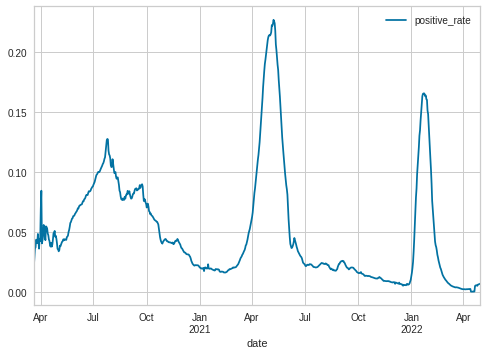

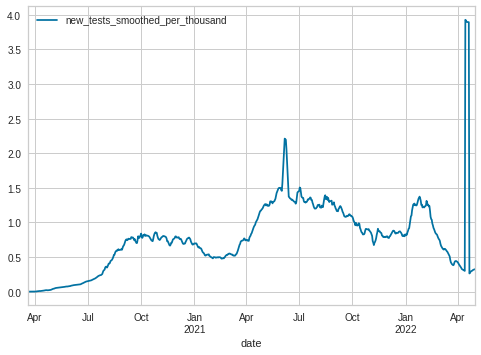

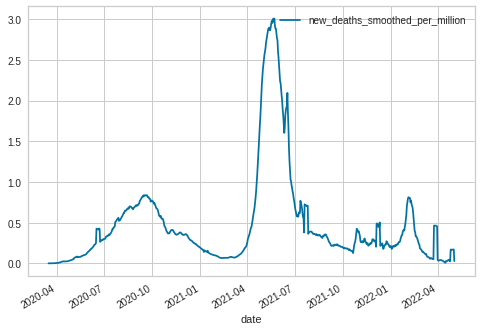

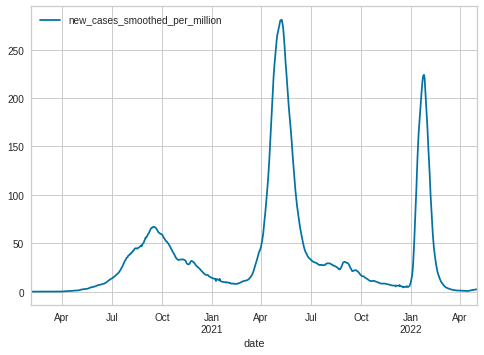

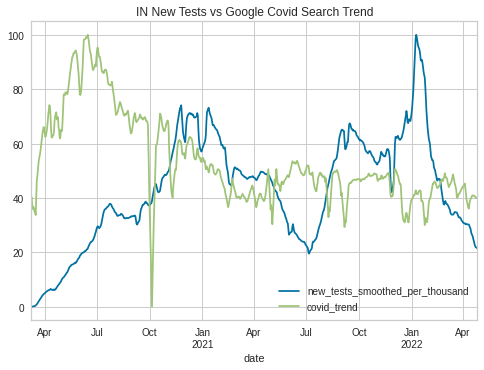

In [ ]:
in_df_pos_rate_nonzero.plot()
in_df_new_test_nonzero.plot()
in_df_death_rate_nonzero.plot()
in_df_new_cases_nonzero.plot()

#new_tests_smoothed_per_thousand
Covid_Death_USA_And_Google = covid_metric_and_google(usa_df_new_test_nonzero, rolling_google_us_trends, 'new_tests_smoothed_per_thousand')
Covid_Death_USA_And_Google.index = pd.to_datetime(Covid_Death_USA_And_Google.date)
Covid_Death_USA_And_Google.plot(title="IN New Tests vs Google Covid Search Trend")
Covid_Death_USA_And_Google

# Covid Positivity Data : Finding the Critical Points (minimas and maximas) 

In [ ]:
def get_minnimas_maximas(df,var,width=10):
  df['min'] = df[var][(df[var].shift(width) > df[var]) & (df[var].shift(-1*width) > df[var])]
  df['max'] = df[var][(df[var].shift(width) < df[var]) & (df[var].shift(-1*width) < df[var])]
  return df

In [ ]:
def get_firstpeak(Covid_Positive_And_Google,var_of_int,width=10):
  # Building an algorithm to identify critical points
  covid_df=get_minnimas_maximas(Covid_Positive_And_Google,var_of_int,width)
  # Plot results
  group_df_maxdates=covid_df[covid_df['max'].notnull()]
  print(group_df_maxdates)
  group_df_maxdates['date'] = pd.to_datetime(group_df_maxdates['date'])
  group_df_maxdates['months']=group_df_maxdates['date'].dt.to_period('M')
  # Picking the last maxima to identify the critical point which is about to Shoot! 
  group_df_maxdates=group_df_maxdates.groupby('months').first()
  first_covid_peak=group_df_maxdates.iloc[0]['date']
  # print(group_df_maxdates.iloc[0]['date'])
  return first_covid_peak

In [ ]:
width_param=10
covid_peak=get_firstpeak(Covid_Death_USA_And_Google,'covid_trend',width_param)
interest_peak=get_firstpeak(Covid_Death_USA_And_Google,'new_tests_smoothed_per_thousand',width_param)

            new_tests_smoothed_per_thousand        date  covid_trend  min  \
date                                                                        
2020-04-03                         5.383424  2020-04-03    63.029198  NaN   
2020-04-04                         5.538342  2020-04-04    64.181559  NaN   
2020-04-05                         5.693261  2020-04-05    65.724810  NaN   
2020-04-06                         5.796540  2020-04-06    67.912774  NaN   
2020-04-07                         6.003098  2020-04-07    70.637017  NaN   
...                                     ...         ...          ...  ...   
2022-04-01                        30.880454  2022-04-01    44.196870  NaN   
2022-04-02                        30.712626  2022-04-02    44.278094  NaN   
2022-04-03                        30.609347  2022-04-03    44.841583  NaN   
2022-04-04                        30.506068  2022-04-04    45.278161  NaN   
2022-04-05                        30.622257  2022-04-05    43.211829  NaN   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
covid_peak,interest_peak

(Timestamp('2020-04-03 00:00:00'), Timestamp('2020-07-19 00:00:00'))

In [ ]:
print(covid_peak)

2020-04-03 00:00:00


In [ ]:
print(interest_peak)

2020-07-19 00:00:00


In [ ]:
covid_peak-interest_peak

Timedelta('-107 days +00:00:00')

In [ ]:
# ANALYSIS : The country was 7 days late to react to covid 19 scare